In [10]:
# 1. Import necessary modules and add project root to sys.path

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
# Import the custom dataset class and default transforms function
from src.data_loading import APTOSDataset, get_default_transforms

In [11]:
# 2. Data upload

# Path to the CSV file containing training data labels
train_csv = "../data/raw/train.csv"
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(train_csv)
# Display the first few rows of the DataFrame to verify loading
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


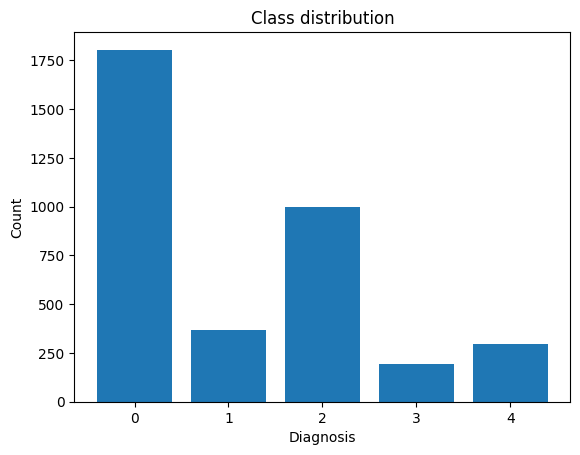

In [12]:
# 3. Class distribution

# Count the number of samples per diagnosis class
counts = Counter(df["diagnosis"])
# Display the counts dictionary
counts
# Create a bar plot of the class distribution
plt.bar(counts.keys(), counts.values())
plt.title("Class distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()



In [13]:
#4. Load dataset

# Add the parent directory to sys.path so Python can find the 'src' package
sys.path.append(os.path.abspath(os.path.join('..')))

# Instantiate the dataset with the CSV path, images directory, and transformations
# This loads the data metadata and prepares image preprocessing
dataset = APTOSDataset(
    csv_path="../data/raw/train.csv",
    images_dir="../data/raw/train_images",
    transform=get_default_transforms()
)

# Print the shape of the image tensor and the label
image.shape, label

# Get the number of samples in the dataset
len(dataset)

3662

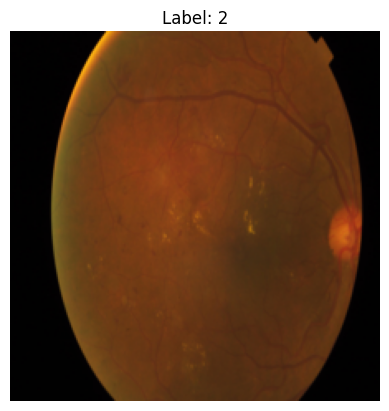

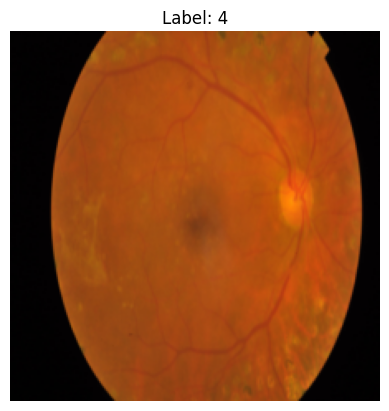

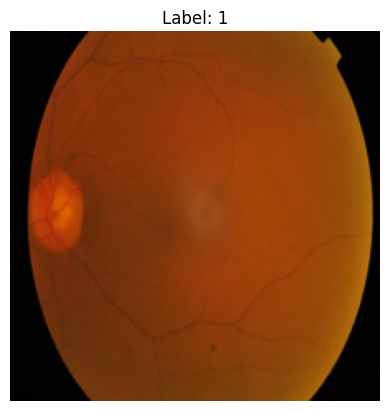

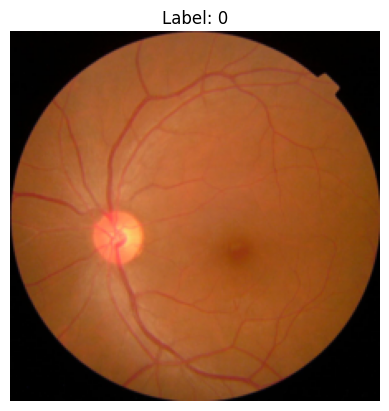

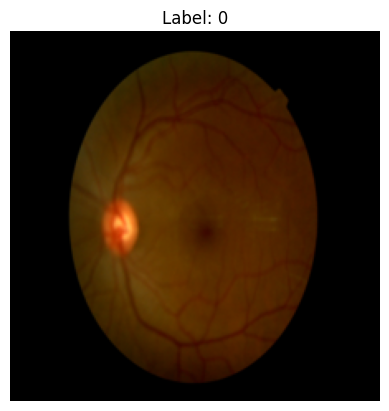

In [14]:
#5. Sample Images

# Import torch and numpy for tensor manipulation
import torch
import numpy as np

# Function to display an image tensor with its label
# img_tensor: tensor image with shape (channels, height, width)
# label: class label associated with the image

def show_image(img_tensor, label):
    # Rearrange tensor dimensions to (height, width, channels) for plotting
    img = img_tensor.permute(1, 2, 0).numpy()
    # Display the image
    plt.imshow(img)
    # Set the title with the label
    plt.title(f"Label: {label}")
    # Hide axis ticks
    plt.axis("off")
    # Show the plot
    plt.show()

# Loop through first 5 samples in the dataset
for i in range(5):
    # Get image tensor and label
    img, label = dataset[i]
    # Show the image with label
    show_image(img, label)